# CS 109A/AC 209A/STAT 121A Data Science: Homework 2
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 21st, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW2.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**


Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [121]:
import numpy as np
import pandas as pd
import random
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.cross_validation import train_test_split as sk_split
from sklearn.linear_model import LinearRegression as Lin_Reg
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import operator

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Hagmann, Tim]

### Part (b): Course Number

[CS 109a]

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

---

## Problem 1: Inside the Models in Scikit-learn

In this problem, we will be implementing K-Nearest Neighbour and simple linear regression for predicting a quantitative variable. We will compare the performance of our implementation with those of Scikit-learn (``sklearn``).

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y. 

### Part (a): Implement the models by hand
In this part you **may not** use ``sklearn`` for any task.

In the following, you may use ``numpy`` arrays instead of ``pandas`` dataframes.

- Implement a funtion ``split``, which satifies:
    - input: an ``nx2`` dataframe ``data``, a float ``m``
    - return: an ``nx2`` dataframe ``train`` and an ``nx2`` dataframe ``test``, consisting of ``m`` percent and ``100 - m`` percent of the data, respectively.


- Implement K-Nearest Neighbour for predicting a quantitative variable. That is, write a function, ``knn_predict``, that satisfies:
    - input: an integer ``k``, an ``n x 2`` dataframe training set ``train``, an ``n x 1`` dataframe testing set ``test``
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.



- Implement linear regression for predicting a quantitative variable. That is, write a function ``linear_reg_fit`` that satisfies:
    - input: an ``nx2`` dataframe training set ``train``
    - return: the coefficients of the linear regression model - a float ``slope`` and a float ``intercept``.
    
    
- Write a function ``linear_reg_predict`` that satisfies:
    - input: an ``nx1`` dataframe testing set ``test``, as well as the coefficients of the linear regression model
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.
    
    
- Implement a function ``score`` that satisfies:
    - input: an ``nx2`` dataframe ``predicted``, an ``nx2`` dataframe ``actual`` 
    - return: R^2 coefficient of the fit of the predicted values.

**Solution:**

In [122]:
## Functions
#-----------
def split(data, m):
    # Find the number of records dataframe
    length = data.shape[0]
    
    # Build a list of integer indices for records in dataframe
    indices = range(length)
    
    # Randomly shuffle the indices
    np.random.shuffle(indices)
    
    # Take 70% of the shuffled list of indices for training
    train_indices = indices[0:int(length * m/100)]
    
    # Take the remainder the shuffled list of indices for testing
    test_indices = indices[int(length * m/100):]
    
    # Get the records for the training indices
    train = data.iloc[train_indices, :]
    # train = train.reset_index(drop=True)
    # train['index'] = train_indices
    
    # Get the records for the testing indices
    test = data.iloc[test_indices, :]
    # test = test.reset_index(drop=True)
    # test['index'] = test_indices

    return train, test

## KNN
#-----
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    n = len(neighbors)
    num_vec = np.zeros(n)
    for i in range(n):
        num_vec[i] = neighbors[i][1]
    return np.mean(num_vec)

def knn_predict(train, test, k):
    # prepare data
    trainingSet=[]
    testSet=[]
    predictions=[]
    actual=[]

    for i in range(len(train)):
        trainingSet.append([train["x"].values[i], train["y"].values[i]])
    for i in range(len(test)):
        testSet.append([test["x"].values[i], test["y"].values[i]])

    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        y = testSet[x][1]
        predictions.append(result)
        actual.append(y)

    d = {'actual': pd.Series(actual),
         'prediction': pd.Series(predictions)}
    return pd.DataFrame(d)

## Linear regression
#-------------------
def linear_reg_fit(train):
    # get x and y vars
    X = train['x'].values
    Y = train['y'].values
    
    # Estimate the coefficients
    beta1 = np.sum((X-np.mean(X)) * (Y-np.mean(Y)))/np.sum( (X-np.mean(X))**2)
    beta0 = np.mean(Y) - beta1*np.mean(X)
    return beta0, beta1

def linear_reg_predict(test, beta0, beta1):
    X = test['x'].values
    Y = test['y'].values
    Y_Hat = beta0 + beta1 * X
    d = {'actual': pd.Series(Y),
         'prediction': pd.Series(Y_Hat)}
    return pd.DataFrame(d)

## Scoring
#---------
# Calculate RSS
def RSS(test):
    actual = test['actual'].values
    prediction = test['prediction'].values
    return np.sum((actual-prediction)**2)

# Calculate TSS
def TSS(test):
    actual = test['actual'].values
    return np.sum((actual - np.mean(actual))**2)

# Calculate R^2
def score(test):
    return (1 - (RSS(test) / TSS(test)))


### Part (b): Compare with ``sklearn``

- Load the contents of ``dataset_1_full.txt`` into a ``pandas`` dataframe, or ``numpy`` array. 


- Use your functions from Part (a) to split the data into training and testing sets (70-30). Evaluate how KNN and linear regression each perform on this dataset.


- Use ``sklearn`` to split the data into training and testing sets (70-30). Use ``sklearn`` to evaluate how KNN and linear regression each perform on this dataset.


- Use Python's ``time`` library to measure how well your implementations compare with that of ``sklearn``. What can you do (algorithmically or codewise) to make your implementation faster or more efficient?

**Solution:**

In [141]:
# Read data into pandas df
df = pd.read_csv('dataset/dataset_1_full.txt')

# Size of data frame
print 'number of total observations:', df.shape[0], "\n"

# Split data
np.random.seed(111) # Set seed
train, test = split(data=df, m=70)

# Print first 5 rows of dataframe
print train.head(n=5)
print 'number of training observations:', train.shape[0], "\n"
print test.head(n=5)
print 'number of test observations:', test.shape[0]

number of total observations: 500 

            x         y
292  0.102934  2.091309
337  0.206823  0.816355
430  0.979152  5.209166
399  0.661935  3.989140
380  0.042114 -0.006533
number of training observations: 350 

            x         y
245  0.449535  2.477697
392  0.843549  3.624430
232  0.682815  1.116077
315  0.547662  3.139188
424  0.357974  1.787528
number of test observations: 150


In [142]:
# Linear regression
start = time.time()
beta0, beta1 = linear_reg_fit(train)
df_myfun_linreg = linear_reg_predict(test, beta0, beta1)
end = time.time()

print "R^2 of my linear regression algorithm:", round(score(df_myfun_linreg), 4)
print "Time elapsed: ", "%s seconds " % (end - start), "\n"

# KNN
start = time.time()
df_myfun_knn = knn_predict(train, test, 10)
end = time.time()

print "R^2 of my knn algorithm:", round(score(df_myfun_knn), 4)
print "Time elapsed: ", "%s seconds " % (end - start), "\n"


R^2 of my linear regression algorithm: 0.3846
Time elapsed:  0.000999927520752 seconds  

R^2 of my knn algorithm: 0.3351
Time elapsed:  0.108999967575 seconds  



In [143]:
## Sklearn KNN
#-------------
train, test = sk_split(df, test_size=0.3, random_state=111)

# get individual values
x_train = train.loc[:,'x'].values
x_train = x_train.reshape((len(x_train), 1))
y_train = train.loc[:,'y'].values
x_test = test.loc[:,'x'].values
x_test = x_test.reshape((len(x_test), 1))
y_test = test.loc[:,'y'].values

# fit knn model
start = time.time()
neighbours = KNN(n_neighbors=10)
neighbours.fit(x_train, y_train)
    
# predict y-values
predicted_y = neighbours.predict(x_test)

# score predictions
r = neighbours.score(x_test, y_test)
end = time.time()

print "R^2 of the sklearn knn algorithm:", round(r, 4)
print "Time elapsed: ", "%s seconds " % (end - start), "\n"


R^2 of the sklearn knn algorithm: 0.3419
Time elapsed:  0.00399994850159 seconds  



In [144]:
## Sklearn Linear regression
#----------------------------

# get individual values
x_train = train.loc[:,'x'].values
x_train = x_train.reshape((len(x_train), 1))
y_train = train.loc[:,'y'].values
x_test = test.loc[:,'x'].values
x_test = x_test.reshape((len(x_test), 1))
y_test = test.loc[:,'y'].values

# fit linear model
start = time.time()
regression = Lin_Reg()
regression.fit(x_train, y_train)
    
# predict y-values
predicted_y = regression.predict(x_test)
    
# score predictions
r = regression.score(x_test, y_test)
end = time.time()

print "R^2 of the sklearn linear regression algorithm:", round(r, 4)
print "Time elapsed: ", "%s seconds " % (end - start), "\n"


R^2 of the sklearn linear regression algorithm: 0.4018
Time elapsed:  0.00799989700317 seconds  



<span style="color:darkblue">
** Comment: ** <br>
As can be seen above, the R^2 results are similar over the different algorithms. It is important to note, that there is a random component involved, i.e., among different runs the algorithms performe differently. However, what can be seen is that my implementation of the KNN algorithm is slower. In order to improve on that result vectorisation of parts of the algorithm could help, i.e., reduce the amount of loops. Furthermore, every time indexing, sorting or copying is done, valuable computation time is lost. It might also helpt to work on those points.
</span>



## Problem 2: Handling Missing Data

In this problem, we will be handling the problem of datasets with missing values. Clearly, we cannot simply remove entire rows or columns that contain missing values. In this problem, we explore two different ways to fill in missing values.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

The files ``dataset_1_missing.txt`` to ``dataset_6_missing.txt`` contains rows that are missing their y-values, where as ``dataset_1_full.txt`` to ``dataset_6_full.txt`` contain datasets with all y-values correctly filled in.

In this problem, you **may not** use ``sklearn`` or build-in ``pandas`` functions to **directly fill in missing values**. Usage of these libraries/pakcages for related tasks is fine.

### Part (a): Model Based Data Imputation

- Describe in detail how predictive models for data (like KNN and simple linear regression) can be used to fill in missing values in a data set.


- Implement your scheme. That is, write code (preferably a function ``fill`` or two functions ``fill_knn``, ``fill_lin_reg``), which takes an ``n x 2`` dataframe or array with values missing in the 2nd column and fills in these values using KNN and linear regression. 


- You need to, also, write code to evaluate the quality of the values you've filled in.

**Solution:**

In [98]:
#--------  fill_knn
#input: missing_df (dataframe), full_df (dataframe), no_y_ind (indices of missing values), 
#       with_y_ind (indices of non-missing values), k (integer)
#output: predicted_df (dataframe), r (float)

def fill_knn(missing_df, full_df, no_y_ind, with_y_ind, k):
    #preparing data in array form
    x_train = missing_df.loc[with_y_ind, 'x'].values
    x_train = x_train.reshape((len(with_y_ind), 1))
    y_train = missing_df.loc[with_y_ind, 'y'].values
    x_test = missing_df.loc[no_y_ind, 'x'].values.reshape((len(no_y_ind), 1))
    y_test = full_df.loc[no_y_ind, 'y'].values
    
    #fit knn model
    neighbours = KNN(n_neighbors=k)
    neighbours.fit(x_train, y_train)
    
    #predict y-values
    predicted_y = neighbours.predict(x_test)
    
    #score predictions
    r = neighbours.score(x_test, y_test)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[no_y_ind, 'y'] = pd.Series(predicted_y, index=no_y_ind)
    
    return predicted_df, r

#--------  fill_ling_reg
#input: missing_df (dataframe), full_df (dataframe), no_y_ind (indices of missing values), 
#       with_y_ind (indices of non-missing values), k (integer)
#output: predicted_df (dataframe), r (float)


def fill_lin_reg(missing_df, full_df, no_y_ind, with_y_ind):
    #preparing data in array form
    x_train = missing_df.loc[with_y_ind, 'x'].values.reshape((len(with_y_ind), 1))
    y_train = missing_df.loc[with_y_ind, 'y'].values
    x_test = missing_df.loc[no_y_ind, 'x'].values.reshape((len(no_y_ind), 1))
    y_test = full_df.loc[no_y_ind, 'y'].values
    
    #fit linear model
    regression = Lin_Reg()
    regression.fit(x_train, y_train)
    
    #predict y-values
    predicted_y = regression.predict(x_test)
    
    #score predictions
    r = regression.score(x_test, y_test)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[no_y_ind, 'y'] = pd.Series(predicted_y, index=no_y_ind)
    
    return predicted_df, r
    

### Part (b): Which Model is Better?

- For datasets ``dataset_1_missing.txt`` to ``dataset_6_missing.txt``, compare the result of filling in the missing values using KNN and linear regression, using both the R^2 coefficient as well as data visualization (the correct y-values are contained in ``dataset_1_full.txt`` to ``dataset_6_full.txt``).. 


- Use your analysis to form conjectures regarding the conditions under which KNN performs better than linear regression, under which linear regression performs better than KNN and under which both perform equally (well or poorly). Explain in detail exactly what might cause each model to fail or perform well. 



- Using ``dataset_1_missing.txt``, explain the impact of the choice of $k$ on the performance of KNN. 


Use numerical analysis and data visualization to support every part of your argument.

**Solution:**

In [99]:
#--------  plot_missing
#input: ax1 (axes), ax2 (axes), 
#       predicted_knn (nx2 dataframe with predicted vals), r_knn (float),
#       predicted_lin (nx2 dataframe with predicted vals), r_lin (float), 
#       k (integer),
#       no_y_ind (indices of rows with missing y-values),
#       with_y_ind (indices of rows with no missing y-values)
#output: ax1 (axes), ax2 (axes)

def plot_missing(ax1, ax2, predicted_knn, r_knn, predicted_lin, r_lin, k, no_y_ind, with_y_ind):
    ax1.scatter(predicted_knn.loc[with_y_ind]['x'].values, 
                predicted_knn.loc[with_y_ind]['y'].values, 
                color='darkblue', alpha = 0.5)

    ax1.scatter(predicted_knn.loc[no_y_ind]['x'].values, 
                predicted_knn.loc[no_y_ind]['y'].values, 
                color='darkred', alpha = 0.5)

    ax1.set_title('KNN, R^2:' + str(r_knn))

    ax2.scatter(predicted_lin.loc[with_y_ind]['x'].values, 
                predicted_lin.loc[with_y_ind]['y'].values,
                color='darkblue', alpha = 0.5)

    ax2.scatter(predicted_lin.loc[no_y_ind]['x'].values, 
                predicted_lin.loc[no_y_ind]['y'].values, 
                color='darkgreen', alpha = 0.5)

    ax2.set_title('Lin Reg, R^2:' + str(r_lin))
    
    return ax1, ax2

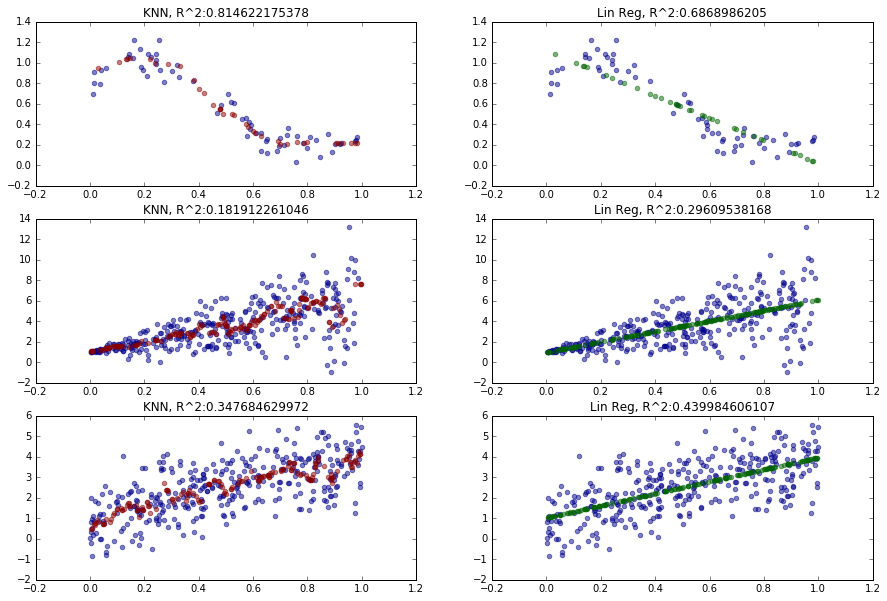

In [100]:
#number of neighbours
k=10

#plot predicted points
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))


#Read dataset 1
missing_df = pd.read_csv('./dataset/dataset_1_missing.txt')
full_df = pd.read_csv('./dataset/dataset_1_full.txt')

no_y_ind = missing_df[missing_df['y'].isnull()].index
with_y_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, 
                                full_df, 
                                no_y_ind, 
                                with_y_ind, 
                                k)

predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                    full_df, 
                                    no_y_ind, 
                                    with_y_ind)

ax5, ax6 = plot_missing(ax5, 
                        ax6, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k,
                        no_y_ind, 
                        with_y_ind)

#Read dataset 4
missing_df = pd.read_csv('./dataset/dataset_4_missing.txt')
full_df = pd.read_csv('./dataset/dataset_4_full.txt')

no_y_ind = missing_df[missing_df['y'].isnull()].index
with_y_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, 
                                full_df, 
                                no_y_ind, 
                                with_y_ind, 
                                k)

predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                    full_df, 
                                    no_y_ind, 
                                    with_y_ind)

ax1, ax2 = plot_missing(ax1, 
                        ax2, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k,
                        no_y_ind, 
                        with_y_ind)

#Read dataset 6
missing_df = pd.read_csv('./dataset/dataset_6_missing.txt')
full_df = pd.read_csv('./dataset/dataset_6_full.txt')

no_y_ind = missing_df[missing_df['y'].isnull()].index
with_y_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, 
                                full_df, 
                                no_y_ind, 
                                with_y_ind, 
                                k)

predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                    full_df, 
                                    no_y_ind, 
                                    with_y_ind)

ax3, ax4 = plot_missing(ax3, 
                        ax4, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k,
                        no_y_ind, 
                        with_y_ind)

plt.show()

<span style="color:darkblue">
** Comments: **
</span>

<span style="color:darkblue">
The scatter plots shows the advantage of KNN, i.e., it tends to perform better when the data is not linear and when the shape of the distribution is odd. On the other hand, when the data is "linear", linear regression performs better than KNN (even with a high choice of $k$). 
</span>

<span style="color:darkblue">
So when does the KNN model fail? The KNN overfits some of the data. This can be seen in model 2 and model 3 where a OLS estimations performas better that the KNN. When the nearest neighbours show extreme variation KNN also does poorly.
</span>




---

## Problem 3: Is the Best (Linear Model) Good Enough?

In this problem, we will specifically look at conditions under which linear regression excels or fails.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

### Part (a): Introduction to Residual Plots

- Read ``dataset_1_full.txt``. Visualize the dataset and make some initial observations.


- For this data set, what can you say about the following linear fits: 

    1. slope = 0.4, intercept = 0.2
    2. slope = 0.4, intercept = 4
    3. linear regression model


- In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values along with  residuals, as well as a residual histogram. What do these plots reveal?  


- Calculate the R^2 coefficient for all three fits. What do the erors reveal? How do they compare to the residual plots?

**Solution:**

In [101]:
## Linear Model
def FitLinearModel(X, Y):
    # Estimate the coefficients
    beta1 = np.sum((X-np.mean(X)) * (Y-np.mean(Y)))/np.sum( (X-np.mean(X))**2)
    beta0 = np.mean(Y) - beta1*np.mean(X)
    return beta0, beta1

def PredictLinearModel(X, beta0, beta1):
    Y = beta0 + beta1 * X
    return Y

# Calculate RSS
def RSS(Y, beta0, beta1):
    return np.sum((Y-PredictLinearModel(X, beta0, beta1))**2)

# Calculate TSS
def TSS(Y):
    return np.sum((Y - np.mean(Y))**2)

# Calculate R^2
def R_Squared(Y, beta0, beta1):
    return (1 - (RSS(Y, beta0, beta1) / TSS(Y)))

## Residual function
def calcResiduals(beta0, beta1):
    Y_hat = PredictLinearModel(X, beta0, beta1)
    return Y_hat - Y 

# Ploting function
def plotIt(beta0, beta1):
    plt.figure(figsize=(15, 10))
    plt.plot(X, Y, 'ro', label='Data', markersize=10, color = "darkblue", alpha = 0.5)
    plt.xlabel('X-Axis'); plt.ylabel('Y-Axis')
    plt.title('Plot')
    plt.grid()
    plt.plot([X, X], [Y, beta0 + beta1 * X] , 'k', color = "darkgrey")
    plt.plot(X, beta0 + beta1 * X, 'b', label="RSS="+str(np.around(RSS(Y, beta0, beta1), decimals=2)))
    plt.legend()



In [102]:
missing_df = pd.read_csv('./dataset/dataset_1_full.txt')

# get x and y vars
X = missing_df['x'].values
Y = missing_df['y'].values


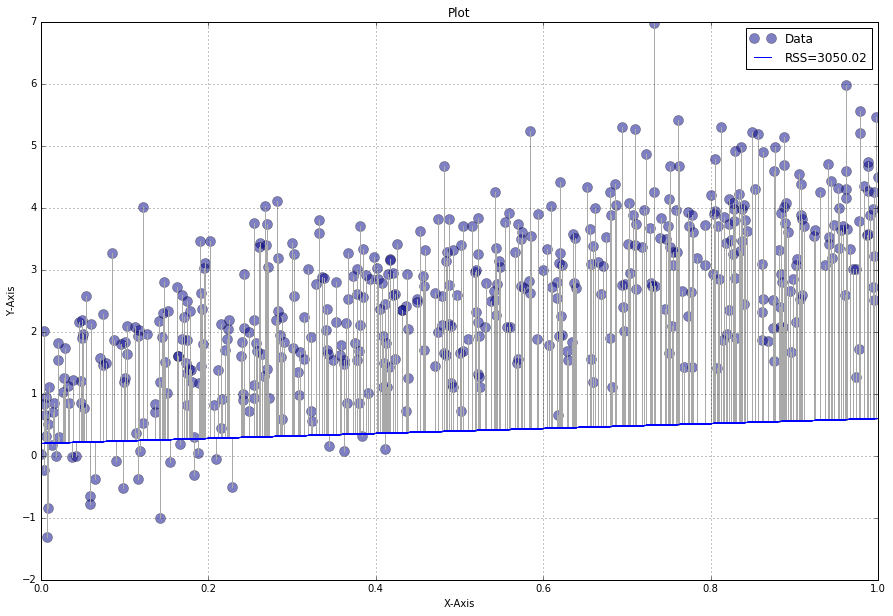

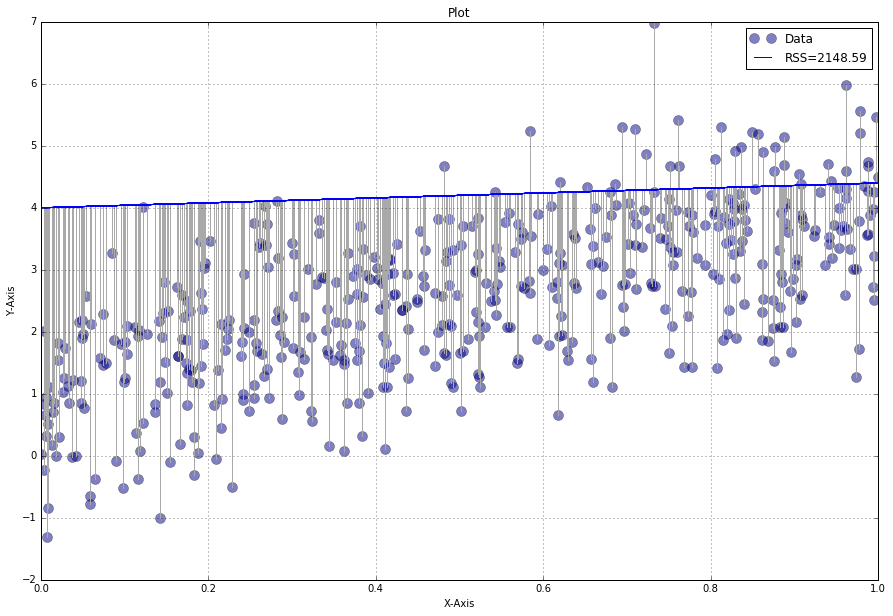

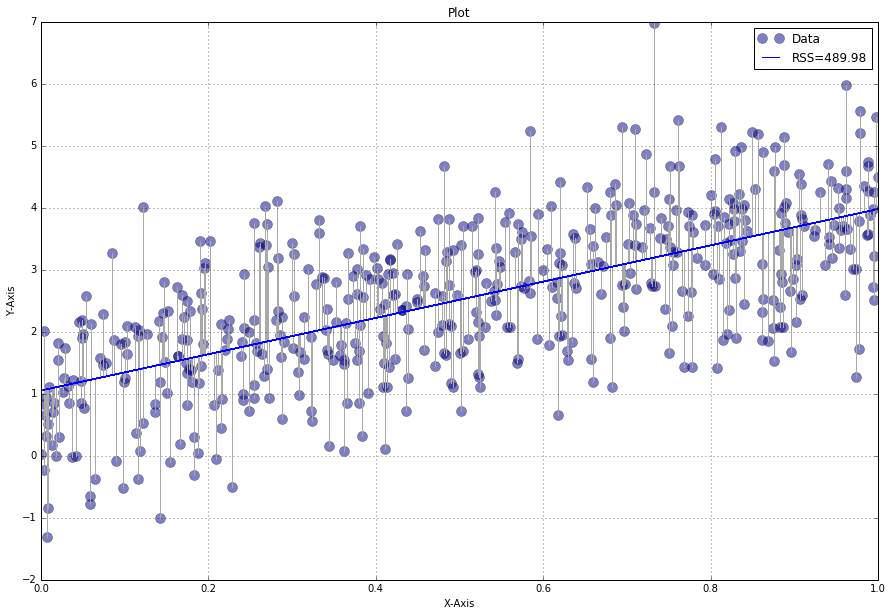

In [103]:
# 1. slope = 0.4, intercept = 0.2
plotIt(beta0=0.2, beta1=0.4)
# 2. slope = 0.4, intercept = 4
plotIt(beta0=4, beta1=0.4)
# 3. linear regression model
beta0_hat, beta1_hat = FitLinearModel(X, Y) # Estimate the coefficients
plotIt(beta0=beta0_hat, beta1=beta1_hat)



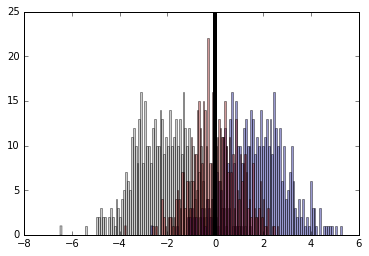

In [104]:
## Calculate residuals
residuals = calcResiduals(beta0=0.2, beta1=0.4)
plt.hist(residuals, bins=100, alpha=0.4, color="grey")
plt.axvline(x=0, linewidth=4)

residuals = calcResiduals(beta0=4, beta1=0.4)
plt.hist(residuals, bins=100, alpha=0.4, color="darkblue")
plt.axvline(x=0, linewidth=4)

residuals = calcResiduals(beta0=beta0_hat, beta1=beta1_hat)
plt.hist(residuals, bins=100, alpha=0.4, color="darkred")
plt.axvline(x=0, linewidth=4, color = "black")



In [105]:
print R_Squared(Y, 0.2, 0.4)
print R_Squared(Y, 4, 0.4)
print R_Squared(Y, beta0_hat, beta1_hat)

-2.54429006179
-1.49677532281
0.430621521722


<span style="color:darkblue">
** Comment: ** <br>
Model 1 and model 2 both are very bad estimators of the underlying pattern in the data. Both the scatterplot as well as the histogram show, that they either systematicly under or overestimate the value of the underlying relationsship. <br>
</span>

<span style="color:darkblue">
The OLS, i.e., model 3 is a much better estimator for the underlying relationship. It is able to explain 43% of the variation in the data. However, the bigger the x the larger the error in the estimation, i.e., there is a heteroscedastic error pattern present. That means that one of the OLS model assumtions is violated. <br>
</span>

<span style="color:darkblue">
The reason that model 1 and model 2 deliever a negativ R^2 is, that the ^2 compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2 is negative, i.e., R^2 is not always the square of anything, so it can have a negative value without violating any rules. R^2 is negative because model 1 and model 2 do not follow the trend of the data, so fits worse than a horizontal line.
</span>

### Part (b): What do Residual Plots Reveal?

- Read datasets ``dataset_2_full.txt`` through ``dataset_6_full.txt``. In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values along with  residuals, as well as a residual histogram. What do these plots reveal about the fit of the model? 


- Calculate the R^2 coefficient each fit. What do the erors reveal? How do they compare to the residual plots?


- Based on your analysis, form conjectures regarding the precise relationship between the residual plots and the fit of the linear regression model. Conjecture on the precise conditions under which linear regression model is an appropriate model for a given dataset.

**Solution:**

** Dataset 2 ** 

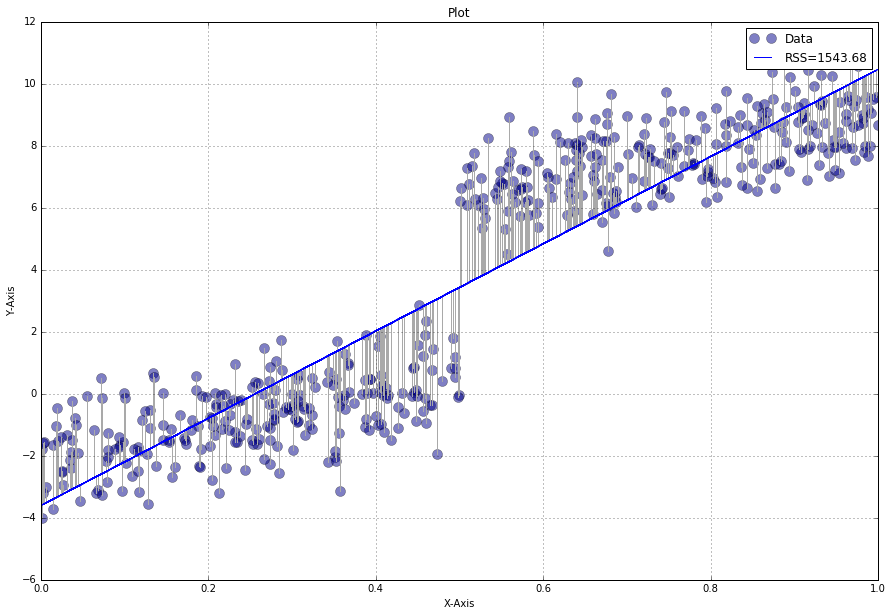

In [106]:
# Load dataset
df = pd.read_csv('./dataset/dataset_2_full.txt')

# get x and y vars
X = df['x'].values
Y = df['y'].values

# linear regression model
beta0_hat, beta1_hat = FitLinearModel(X, Y) # Estimate the coefficients
plotIt(beta0=beta0_hat, beta1=beta1_hat)


0.842957182013


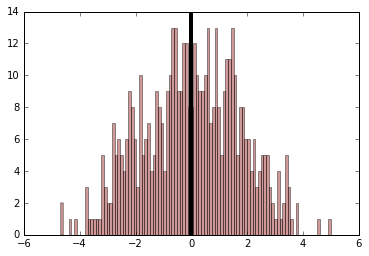

In [107]:
## Calculate residuals
residuals = calcResiduals(beta0=beta0_hat, beta1=beta1_hat)
plt.hist(residuals, bins=100, alpha=0.4, color="darkred")
plt.axvline(x=0, linewidth=4, color = "black")

print R_Squared(Y, beta0_hat, beta1_hat)


<span style="color:darkblue">
** Comment: ** <br>
This model is able to explain 84% of the variation in the data. the histogram also looks very good. However, looking at the scatterplot reveals, that there is a shift or break at the 0.5 mark. It would be much better to create two seperate models one for < 0.5 and one for > 0.5.
</span>


** Dataset 3** 


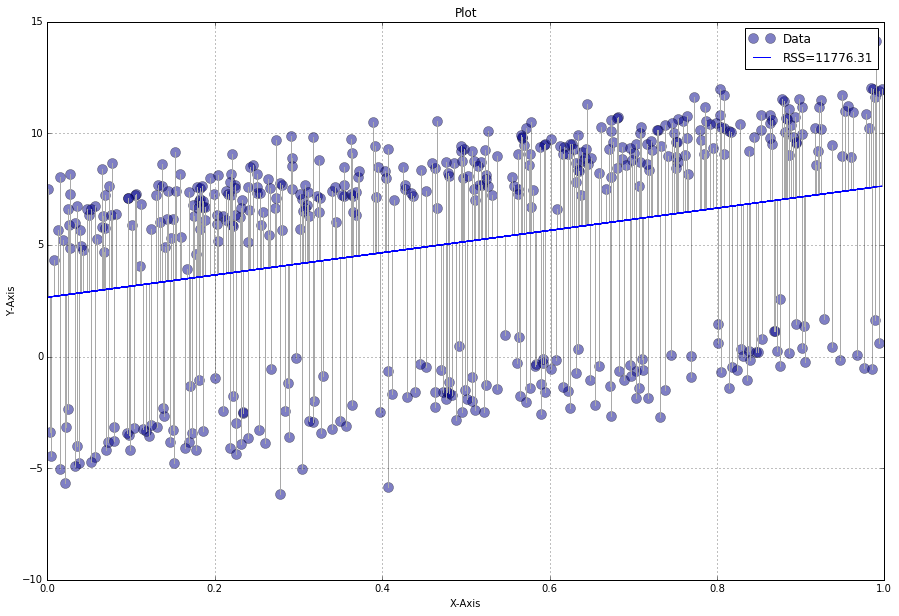

In [108]:
# Load dataset
df = pd.read_csv('./dataset/dataset_3_full.txt')

# get x and y vars
X = df['x'].values
Y = df['y'].values

# linear regression model
beta0_hat, beta1_hat = FitLinearModel(X, Y) # Estimate the coefficients
plotIt(beta0=beta0_hat, beta1=beta1_hat)

0.0779354128276


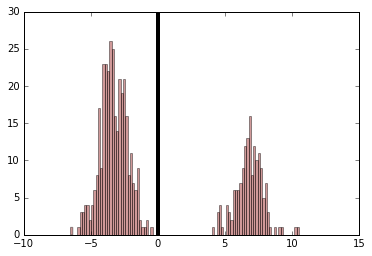

In [109]:
## Calculate residuals
residuals = calcResiduals(beta0=beta0_hat, beta1=beta1_hat)
plt.hist(residuals, bins=100, alpha=0.4, color="darkred")
plt.axvline(x=0, linewidth=4, color = "black")

print R_Squared(Y, beta0_hat, beta1_hat)


<span style="color:darkblue">
** Comment: ** <br>
The histogram shows, that there are two distince error distribution, i.e., there is something else going on in the data. That means, that the errors are not normaly distributed. Results and interpretations of the model are either always under or always overestimated. This can also be seen by the fact that the model is only able to explain 7.8% of the variation in the data. 
</span>


** Dataset 4 **

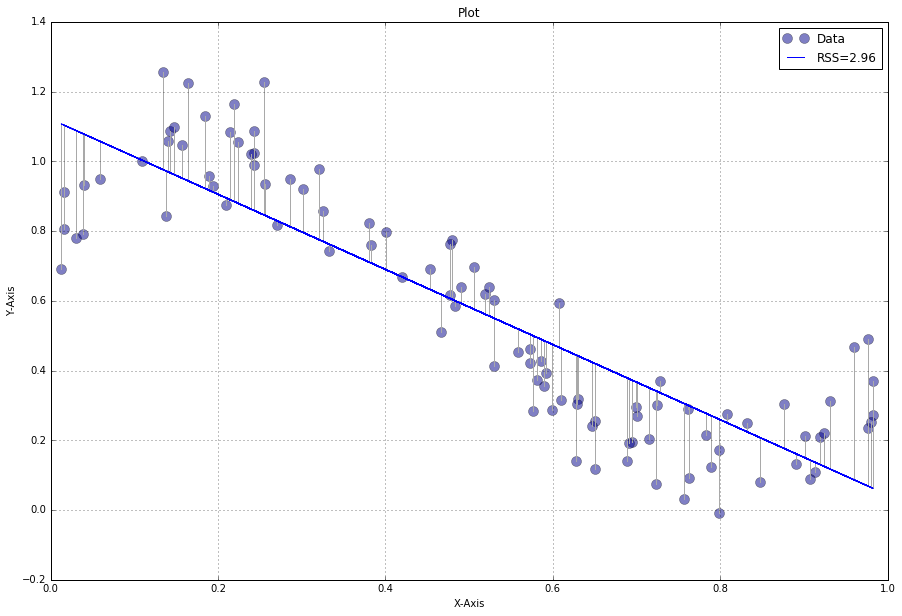

In [110]:
# Load dataset
df = pd.read_csv('./dataset/dataset_4_full.txt')

# get x and y vars
X = df['x'].values
Y = df['y'].values

# linear regression model
beta0_hat, beta1_hat = FitLinearModel(X, Y) # Estimate the coefficients
plotIt(beta0=beta0_hat, beta1=beta1_hat)

0.758102286902


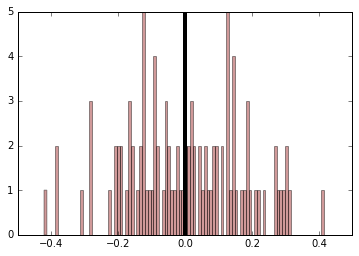

In [111]:
## Calculate residuals
residuals = calcResiduals(beta0=beta0_hat, beta1=beta1_hat)
plt.hist(residuals, bins=100, alpha=0.4, color="darkred")
plt.axvline(x=0, linewidth=4, color = "black")

print R_Squared(Y, beta0_hat, beta1_hat)


<span style="color:darkblue">
** Comment: ** <br>
The model is able to explain around 76% of the variation in the data. That is quit a good value. The histogram doesn't have enough density around zero. Looking at the scatterplot shows, that there is a polynomial pattern present in the data. The model would be mouch better if it would consider this circumstance. Otherwise it systematicly under or overestimated the y value.
</span>


** Dataset 5 **

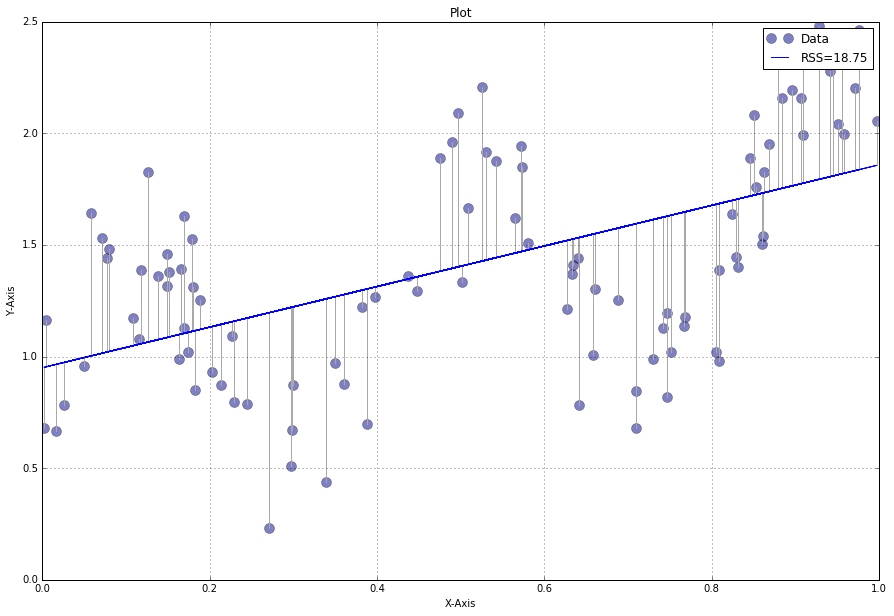

In [112]:
# Load dataset
df = pd.read_csv('./dataset/dataset_5_full.txt')

# get x and y vars
X = df['x'].values
Y = df['y'].values

# linear regression model
beta0_hat, beta1_hat = FitLinearModel(X, Y) # Estimate the coefficients
plotIt(beta0=beta0_hat, beta1=beta1_hat)

0.298392982511


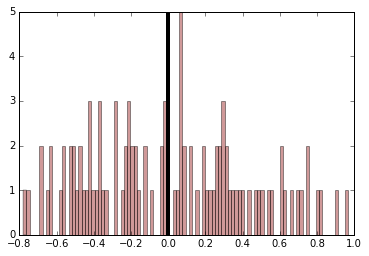

In [113]:
## Calculate residuals
residuals = calcResiduals(beta0=beta0_hat, beta1=beta1_hat)
plt.hist(residuals, bins=100, alpha=0.4, color="darkred")
plt.axvline(x=0, linewidth=4, color = "black")

print R_Squared(Y, beta0_hat, beta1_hat)


** Comment ** <br>
It appears that there is a seasonal or autocorrelated pattern in data. Only 30% of the variation of the data is explained by the linear model. It should be adjusted for this effect, otherwise, while the trend line is okay an interpretation would be spurios.

** Dataset 6 **

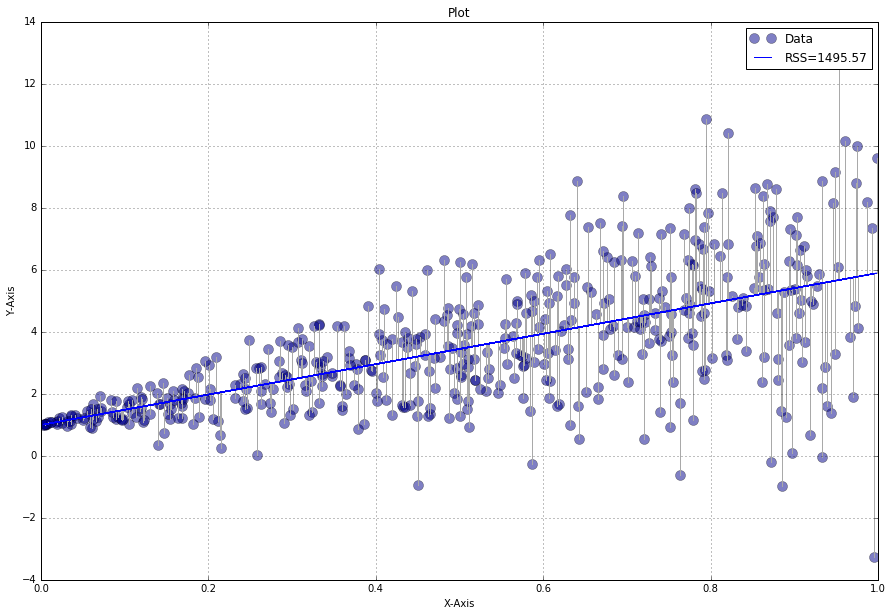

In [114]:
# Load dataset
df = pd.read_csv('./dataset/dataset_6_full.txt')

# get x and y vars
X = df['x'].values
Y = df['y'].values

# linear regression model
beta0_hat, beta1_hat = FitLinearModel(X, Y) # Estimate the coefficients
plotIt(beta0=beta0_hat, beta1=beta1_hat)

0.38339231828


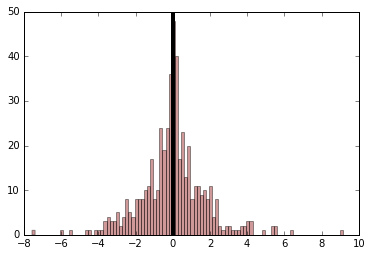

In [115]:
## Calculate residuals
residuals = calcResiduals(beta0=beta0_hat, beta1=beta1_hat)
plt.hist(residuals, bins=100, alpha=0.4, color="darkred")
plt.axvline(x=0, linewidth=4, color = "black")

print R_Squared(Y, beta0_hat, beta1_hat)


<span style="color:darkblue">
** Comment: ** <br>
Even though that the histogram looks good the R^2 is only around 38% of the variation in the data. The scatterplot shows, that the trendline fits well the overall direction. The problem is the heteroscedastic behavior of the error. The bigger the X the bigger the error. This violates on of the OLS assumtions. The model should consider this behavior, otherwise spurios interpretations might be reached. 
</span>


---

## Challenge Problem: Combining Random Variables

This problem, we explore the distirbution of random variables that result from combining other random variables.

### Part (a): Adding Two Uniformly Distributed Variables

Consider the independent random variables $X\sim U(0, 1)$ and $Y\sim U(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

**Solution:**

### Part (b): Adding Multiple Uniformly Distributed Variables

Consider three independent random variables $X_1, X_2, X_3 \sim U(0, 1)$. Let $Z$ be the random variable $Z = X_1 + X_2 + X_3$. 

What is the distribution of $Z$? What if you add 10 or 12 independent (standard) uniformly distributed variables? Conjecture on the distribution of 
$$
Z = \lim_{n\to \infty} \sum_{i=1}^n X_i
$$
where $\left\{X_i \right\}$ are independent (standard) uniformly distributed variables.

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

**Solution:**

### Part (c): Combining Normally Distributed Variables

Consider the independent random variables $X\sim \mathcal{N}(0, 1)$ and $Y\sim \mathcal{N}(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** use properties of expected value and some experimentation.

**Solution:**

### Part (d): Product of Normally Distributed Variables

Is the product of two normally distributed variables a normally distributed variable? You should fully explain and support your conlusion. 

**Solution:**

---